In [1]:
%load_ext watermark
%watermark -a Chan -d -v -p numpy,pandas,sklearn,konlpy,tensorflow,matplotlib,imblearn

Chan 2019-08-14 

CPython 3.7.3
IPython 7.6.1

numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
konlpy 0.5.1
tensorflow 1.13.1
matplotlib 3.1.0
imblearn 0.5.0


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt
import tensorflow as tf
from tensorflow.python.keras.preprocessing import sequence
from tensorflow import keras
from tqdm import tqdm
from collections import Counter
from matplotlib import pyplot as plt
import pickle

# Load datasets

In [3]:
datasets = pd.DataFrame()
for i in range(1,9):
    print(i)
    dump = pd.read_csv("../../data/labeled ({}).csv".format(i), engine='python')
    datasets = pd.concat([datasets, dump])
datasets.head()

1
2
3
4
5
6
7
8


,comment,url_id,label
0,ㅜㅜ,77,0
1,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,17,0
2,헐,52,0
3,제시,75,0
4,이거인 듯,18,0


In [4]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 0 to 2999
Data columns (total 3 columns):
comment    23999 non-null object
url_id     24000 non-null int64
label      24000 non-null int64
dtypes: int64(2), object(1)
memory usage: 750.0+ KB


In [5]:
datasets.comment.fillna('NULL',inplace=True)

In [6]:
datasets.reset_index(drop=True,inplace=True)

In [7]:
bad_data = datasets[datasets.label==1]

# Tokenize
## 형태소분석

In [8]:
morp = Okt()

C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [9]:
morped = str()
for _ in tqdm(bad_data.comment):
    tmp = morp.pos(_, norm=True, stem=True)
    for __ in tmp:
        if __[1] in ['KoreanParticle', 'Noun', 'Adjective']:
            morped += __[0]+'\n'

100%|██████████████████████████████████████████████████████████████████████████████| 1114/1114 [00:17<00:00, 63.19it/s]


In [10]:
from wordcloud import WordCloud

In [11]:
wc= WordCloud(font_path='C:Windows/Fonts/NanumGothic.ttf',
              width = 800,
              height = 800,
              background_color='white').generate(morped)

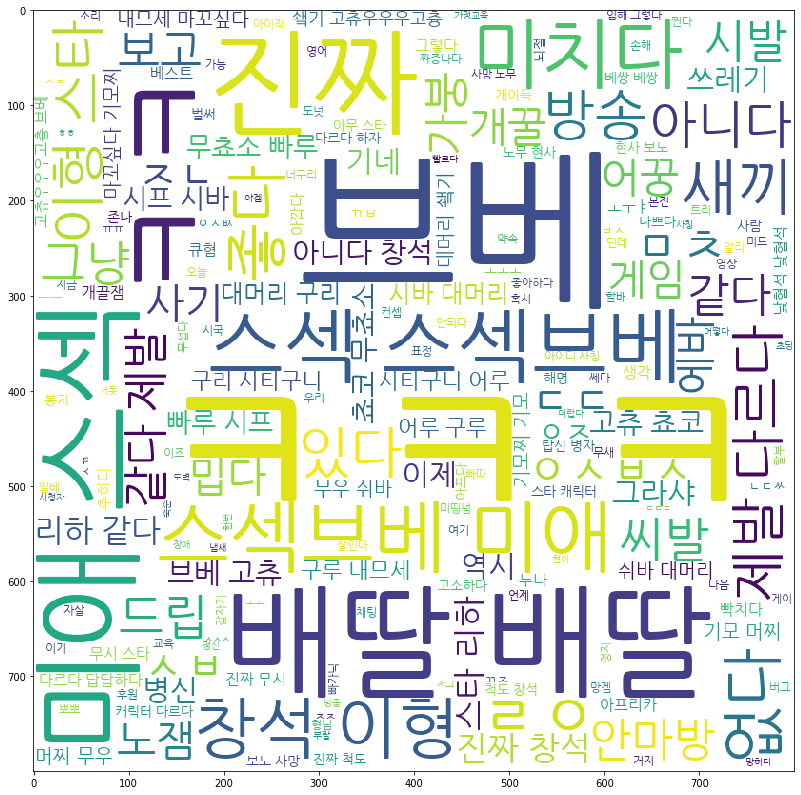

In [12]:
fig = plt.figure(figsize=(14,14))
plt.imshow(wc)

In [66]:
# fig.savefig('all_wordcloud.png')

In [13]:
from collections import Counter

In [14]:
cnt = Counter(morped.split('\n'))

In [15]:
cnt.most_common(10000)

[('ㅋㅋㅋ', 126),
 ('개', 88),
 ('브베', 73),
 ('노', 47),
 ('망', 47),
 ('무', 46),
 ('미애', 44),
 ('속', 44),
 ('보', 44),
 ('현', 44),
 ('진짜', 41),
 ('사', 41),
 ('ㅋㅋ', 36),
 ('배딸', 30),
 ('스섹', 26),
 ('스타', 24),
 ('듀', 24),
 ('스섹브베', 24),
 ('같다', 23),
 ('미치다', 23),
 ('다르다', 22),
 ('ㅈ', 21),
 ('창석', 21),
 ('나', 20),
 ('형', 17),
 ('이형', 17),
 ('놈', 17),
 ('ㄹㅇ', 16),
 ('발', 16),
 ('아니다', 16),
 ('애', 16),
 ('좋다', 15),
 ('거', 15),
 ('없다', 15),
 ('새끼', 14),
 ('제발', 14),
 ('씨', 14),
 ('대머리', 14),
 ('이', 13),
 ('방송', 12),
 ('도', 12),
 ('섹', 12),
 ('있다', 12),
 ('좀', 12),
 ('잉', 12),
 ('리', 11),
 ('ㅁㅊ', 10),
 ('끼', 10),
 ('네', 10),
 ('그냥', 9),
 ('씨발', 9),
 ('조', 9),
 ('돈', 9),
 ('니', 9),
 ('내', 9),
 ('것', 9),
 ('처', 9),
 ('드립', 9),
 ('시발', 8),
 ('그렇다', 8),
 ('베', 8),
 ('쌍', 8),
 ('강', 8),
 ('브', 8),
 ('암', 8),
 ('ㅇㅅㅂㅅ', 8),
 ('ㄷㄷ', 8),
 ('가붕', 8),
 ('ㅅㅂ', 8),
 ('패', 8),
 ('좆', 8),
 ('안마방', 8),
 ('시바', 8),
 ('겜', 8),
 ('바', 8),
 ('보고', 8),
 ('ㅈㄴ', 7),
 ('노잼', 7),
 ('어꿍', 7),
 ('마', 7),
 ('리하', 7),
 ('개꿀', 

In [16]:
# load model
up_model = keras.models.load_model('../model/cnn_oversample.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [22]:
morp = Okt()
morped = [morp.morphs(_, norm=True, stem=True) for _ in tqdm(datasets.comment)]

100%|███████████████████████████████████████████████████████████████████████████| 24000/24000 [00:35<00:00, 677.67it/s]


In [23]:
# load vocab
with open('./vocab/vocab_index.pickle', 'rb') as f:
    vocab_index = pickle.load(f)
with open('./vocab/vocab_inverted_index.pickle', 'rb') as f:
    vocab_inverted_index = pickle.load(f)

In [24]:
def text_to_index(tokens):
    oov_id = 1
    indexes = []
    for tok in tokens:
        if tok in vocab_index:
            indexes.append(vocab_index[tok])
        else:
            indexes.append(oov_id)

    return indexes

In [25]:
pad_id = 0

x_variable = [text_to_index(_) for _ in morped]

sentence_size = 10
x_padded = sequence.pad_sequences(x_variable,
                                 maxlen=sentence_size,
                                 truncating='post',
                                 padding='post',
                                 value=pad_id)

In [26]:
datasets['predict_up'] = up_model.predict_classes(x_padded)

In [31]:
predicted = datasets[datasets.predict_up==1].comment

In [42]:
bad_morped = str()
for _ in tqdm(predicted):
    tmp = morp.pos(_, norm=True, stem=True)
    for __ in tmp:
        if __[1] in ['KoreanParticle', 'Noun', 'Adjective']:
            bad_morped += __[0]+'\n'

100%|█████████████████████████████████████████████████████████████████████████████| 1711/1711 [00:03<00:00, 438.63it/s]


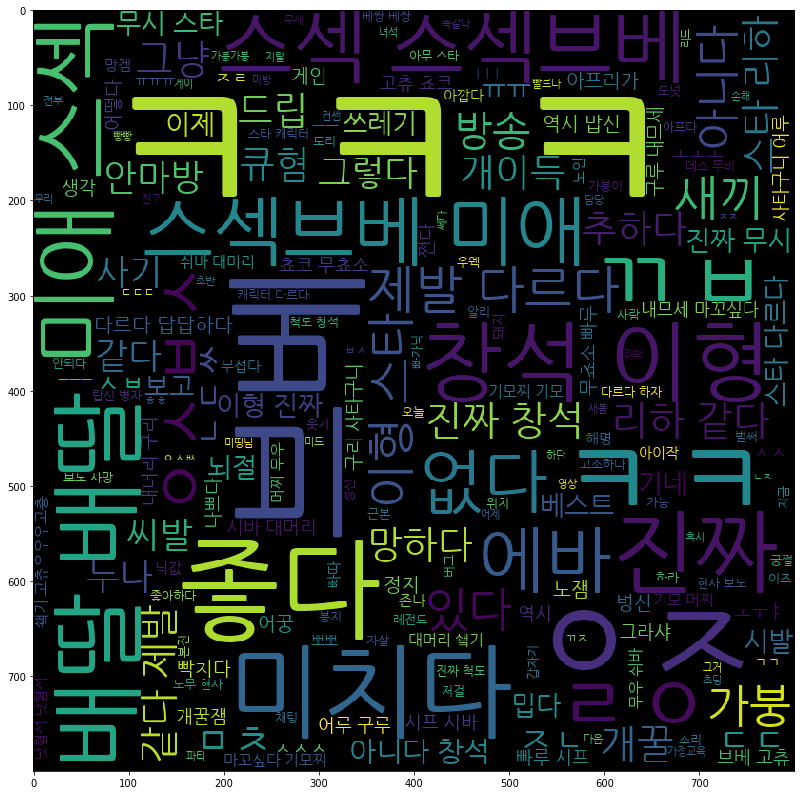

In [44]:
bad_wc= WordCloud(font_path='C:Windows/Fonts/NanumGothic.ttf',
              width = 800,
              height = 800).generate(bad_morped)

fig = plt.figure(figsize=(14,14))
plt.imshow(bad_wc)

In [45]:
fig.savefig('bad_wordcloud.png')

In [71]:
cnt = Counter(morped.split('\n'))

cnt.most_common(10000)

[('ㅋㅋㅋ', 126),
 ('개', 88),
 ('브베', 73),
 ('노', 47),
 ('망', 47),
 ('무', 46),
 ('미애', 44),
 ('속', 44),
 ('보', 44),
 ('현', 44),
 ('진짜', 41),
 ('사', 41),
 ('ㅋㅋ', 36),
 ('배딸', 30),
 ('스섹', 26),
 ('스타', 24),
 ('듀', 24),
 ('스섹브베', 24),
 ('같다', 23),
 ('미치다', 23),
 ('다르다', 22),
 ('ㅈ', 21),
 ('창석', 21),
 ('나', 20),
 ('형', 17),
 ('이형', 17),
 ('놈', 17),
 ('ㄹㅇ', 16),
 ('발', 16),
 ('아니다', 16),
 ('애', 16),
 ('좋다', 15),
 ('거', 15),
 ('없다', 15),
 ('새끼', 14),
 ('제발', 14),
 ('씨', 14),
 ('대머리', 14),
 ('이', 13),
 ('방송', 12),
 ('도', 12),
 ('섹', 12),
 ('있다', 12),
 ('좀', 12),
 ('잉', 12),
 ('리', 11),
 ('ㅁㅊ', 10),
 ('끼', 10),
 ('네', 10),
 ('그냥', 9),
 ('씨발', 9),
 ('조', 9),
 ('돈', 9),
 ('니', 9),
 ('내', 9),
 ('것', 9),
 ('처', 9),
 ('드립', 9),
 ('시발', 8),
 ('그렇다', 8),
 ('베', 8),
 ('쌍', 8),
 ('강', 8),
 ('브', 8),
 ('암', 8),
 ('ㅇㅅㅂㅅ', 8),
 ('ㄷㄷ', 8),
 ('가붕', 8),
 ('ㅅㅂ', 8),
 ('패', 8),
 ('좆', 8),
 ('안마방', 8),
 ('시바', 8),
 ('겜', 8),
 ('바', 8),
 ('보고', 8),
 ('ㅈㄴ', 7),
 ('노잼', 7),
 ('어꿍', 7),
 ('마', 7),
 ('리하', 7),
 ('개꿀', 